In [58]:
import mne
import matplotlib.pyplot as plt
import pickle
import pyxdf

class EEG:
    def __init__(self):
        self.eeg_data = None

    def readEEG(self, file_path):
        # Read EEG data from XDF file format using pyxdf
        streams, header = pyxdf.load_xdf(file_path)
        eeg_streams = [s for s in streams if 'eeg' in s['info']['type'][0].lower()]
        if not eeg_streams:
            raise ValueError("No EEG data found in the XDF file.")

        # Extract EEG data from the first eeg stream (assuming only one EEG stream)
        eeg_array = eeg_streams[0]['time_series']
        sfreq = eeg_streams[0]['info']['nominal_srate'][0]

        # Create an MNE RawArray object
        self.eeg_data = mne.io.RawArray(eeg_array.T, info=mne.create_info(ch_names=eeg_array.T.shape[0], sfreq=sfreq))

    def displayEEG(self):
        # Display all EEG channels on the same figure
        if self.eeg_data is None:
            raise ValueError("No EEG data available. Please load or read EEG data first.")

        self.fig = self.eeg_data.plot(scalings=dict(eeg=100e-6), duration=1, start=14, show=True)
        plt.show()


    def saveFigure(self, file_path):
        # Save the figure displayed using displayEEG
        if self.eeg_data is None:
            raise ValueError("No EEG data available. Please load or read EEG data first.")

        self.fig.savefig(file_path)

    def exportEEG(self, file_path):
        # Export the object(s) that hold(s) EEG data
        if self.eeg_data is None:
            raise ValueError("No EEG data available. Please load or read EEG data first.")

        with open(file_path, 'wb') as file:
            pickle.dump(self.eeg_data, file)

    def loadEEG(self, file_path):
        # Load the object(s) that hold(s) EEG data
        with open(file_path, 'rb') as file:
            self.eeg_data = pickle.load(file)


In [ ]:
# Example usage
eeg_instance = EEG()

# Read EEG data from XDF file
eeg_instance.readEEG('1_0_0_Baseline.xdf')

Creating RawArray with float64 data, n_channels=34, n_times=44904
    Range : 0 ... 44903 =      0.000 ...    44.903 secs
Ready.


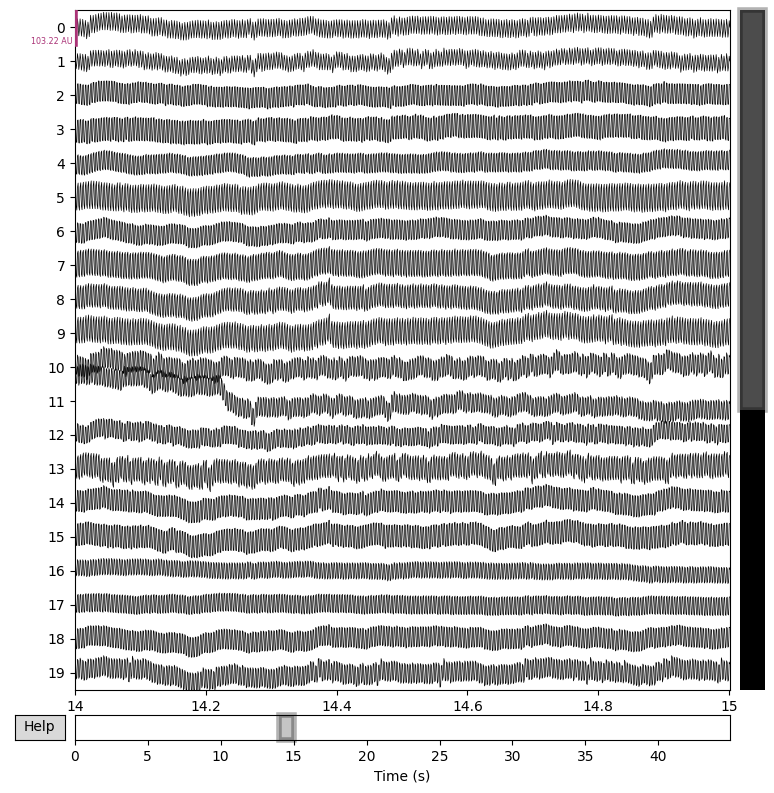

In [60]:
eeg_instance.displayEEG()


In [61]:
eeg_instance.saveFigure('eeg_figure.png')

In [62]:
eeg_instance.exportEEG('eeg_data.pkl')

In [63]:
eeg_instance.loadEEG('eeg_data.pkl')

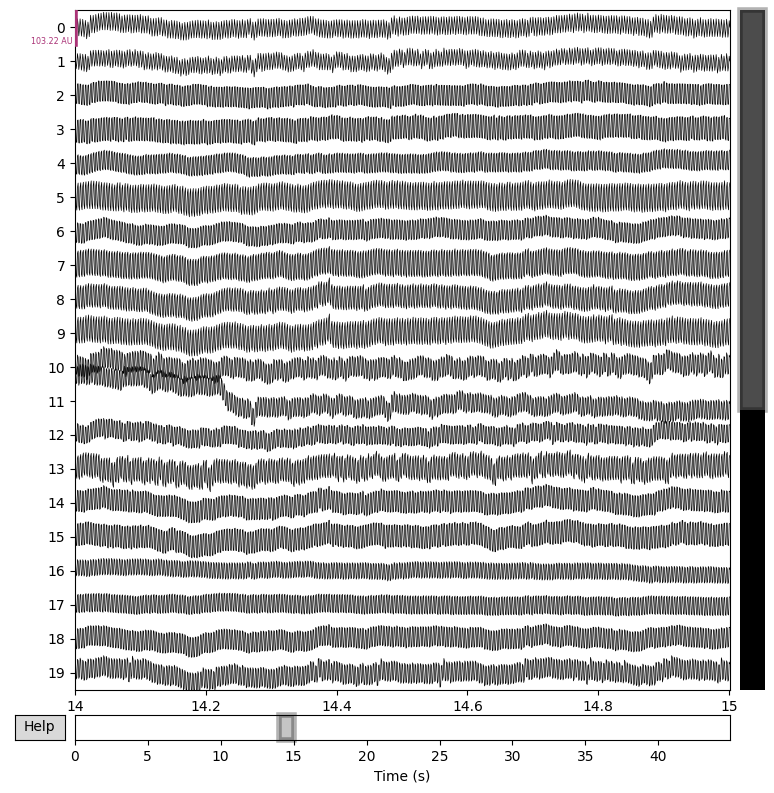

In [64]:
eeg_instance.displayEEG()